# LOAD THE DATSET

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

!pip3 install skip

    100% |████████████████████████████████| 61kB 1.8MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 5.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/6f/2b/7c242e58b1b332a123b4a7bf358e2cc7fa7d904b3576b87defc9528e2bfd/Pillow-8.3.2-cp36-cp36m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Running setup.py bdist_wheel for skip ... done
  Stored in directory: /home/nagender/.cache/pip/wheels/fc/f4/c1/59b3bfc166df8830a610b78947a418728725874bb18d66de20
  Running setup.py bdist_wheel for kurt ... done
  Stored in directory: /home/nagender/.cache/pip/wheels/20/dc/10/b7ed95932a3ea31c8e54a44053c741cdeb088b0718e0a817f7
  Running setup.py bdist_wheel for construct ... done
  Stored in directory: /home/nagender/.cache/pip/wheels/9d/52/65/88ff591d19f6f84531379cdbc6291eb6ab6c61c7d7b0b3ae14
Successfully built skip kurt construct


In [ ]:
import pandas
import random

filename = "2014.csv" 
df = pandas.read_csv(filename)

In [14]:
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
1,8009901763,13657MD,NY,COM,09/27/2016,19,DELV,KENWO,T,10510,...,RD,NaN,2013,NaN,0,01 9,19-No Stand (bus stop),NaN,NaN,NaN
2,8344027755,GUP8589,NY,PAS,12/07/2016,21,SUBN,NISSA,T,67730,...,SILVE,NaN,2008,NaN,0,03 3,21-No Parking (street clean),NaN,NaN,NaN
3,8335524634,55219MA,NY,COM,10/22/2016,47,VAN,DODGE,T,34250,...,WHITE,NaN,2015,NaN,0,16 6,47-Double PKG-Midtown,NaN,NaN,NaN
4,8358531096,FGN4109,NY,PAS,11/14/2016,20,SUBN,CHRYS,T,29830,...,BL,NaN,2014,NaN,0,55 3,20A-No Parking (Non-COM),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612772,1415891400,HGK6453,NJ,PAS,11/02/2068,21,SDN,HONDA,S,17380,...,BLACK,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2612773,1384716543,GRA6240,NY,PAS,07/12/2069,20,SUBN,TOYOT,X,93830,...,GRAY,0.0,2007,-,0,NaN,NaN,NaN,NaN,NaN
2612774,1413536554,RC8S28,PA,PAS,08/14/2069,46,SUBN,NaN,P,37980,...,RED,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
2612775,1415514203,HGU9544,NY,PAS,11/15/2069,40,SUBN,JEEP,P,0,...,BROWN,0.0,2011,-,0,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(2612777, 43)

In [17]:
# deep and shallow copy
data = df


In [18]:
data.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [23]:
# Convert 'IssueDate' to datetime
data['IssueDate'] = pd.to_datetime(data['IssueDate'],format='%m/%d/%Y',errors='coerce')

# Replace '99' in RegistrationState column by null
data['RegistrationState'] = data['RegistrationState'].replace({'99': None})

# Replace '999' in PlateType column by null
data['PlateType'] = data['PlateType'].replace({'999': None})

# Convert incorrent values (88888888, etc.) in 'VehicleExpirationDate' column to Null
incorrect_values = data[(data['VehicleExpirationDate'] > 20990101)]['VehicleExpirationDate'].unique().tolist()
data[data['VehicleExpirationDate'].isin(incorrect_values)] = None

# Convert 'ViolationTime' column to stirng and convert values not containing 'A/P' (ambiguous) to null
data['ViolationTime'] = data['ViolationTime'].astype('str')
ViolationTime_ambiguous = data[~data['ViolationTime'].str.contains('P|A')]['ViolationTime'].unique().tolist()
data[data['ViolationTime'].isin(ViolationTime_ambiguous)] = None

# Fix 'DateFirstObserved' column
    # Replace NaN values with 0
    # Replace 0 with null
    # Convert the column to datetime
data['DateFirstObserved'] = data['DateFirstObserved'].replace({np.NaN:0}).astype('int') 
data['DateFirstObserved'] = data['DateFirstObserved'].replace({0:None})
data['DateFirstObserved'] = pd.to_datetime(data['DateFirstObserved'],format='%Y%m%d',errors='coerce')

# Drop duplicates based on 'SummonsNumber' column as summon numbers should be unique
data.drop_duplicates(subset = ['SummonsNumber'], inplace = True)

In [25]:
# Vehicle registration state (Top 10) vs Summons
data.groupby(['RegistrationState']).count()['SummonsNumber'].sort_values(ascending=False).reset_index().head(10)

,RegistrationState,SummonsNumber
0,NY,1926092
1,NJ,80248
2,PA,64467
3,FL,34077
4,CT,20784
5,MA,18874
6,VA,17111
7,MD,13305
8,NC,12660
9,IN,9562


## Analysis

<AxesSubplot:xlabel='IssuingAgency', ylabel='SummonsNumber'>

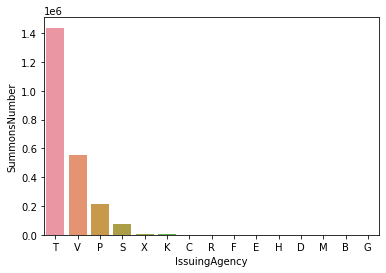

In [26]:
# Issuing agency vs Summons dataframe
ia_plot = data.groupby(['IssuingAgency']).count()['SummonsNumber'].sort_values(ascending=False).reset_index()
# Bar plot
sns.barplot(x = 'IssuingAgency', y = 'SummonsNumber', data = ia_plot)

In [27]:
# Plate Type (Top 10) vs Summons
data.groupby(['PlateType']).count()['SummonsNumber'].sort_values(ascending=False).reset_index().head(10)

,PlateType,SummonsNumber
0,PAS,1731748
1,COM,331560
2,OMT,110072
3,OMS,26506
4,SRF,21486
5,IRP,13299
6,TRC,6471
7,MOT,6257
8,OMR,5005
9,ORG,4272


<AxesSubplot:xlabel='SummonsNumber', ylabel='ViolationDescription'>

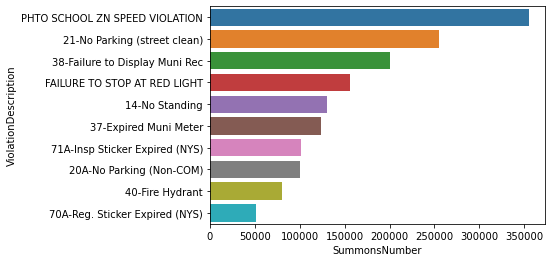

In [28]:
# Top 10 Violations dataframe
top_10_violations = data.loc[:,['ViolationDescription','SummonsNumber']].groupby(['ViolationDescription']).count()['SummonsNumber'].reset_index().sort_values('SummonsNumber',ascending = False).head(10)
# Bar plot
sns.barplot(x = 'SummonsNumber', y = 'ViolationDescription', data = top_10_violations)

In [29]:
# Registration State, Violation Description & Summons Number
data.loc[:,['RegistrationState','ViolationDescription','SummonsNumber']].groupby(['RegistrationState','ViolationDescription']).count()['SummonsNumber'].reset_index().sort_values('SummonsNumber',ascending = False).head(5)

,RegistrationState,ViolationDescription,SummonsNumber
1553,NY,PHTO SCHOOL ZN SPEED VIOLATION,304254
1473,NY,21-No Parking (street clean),211536
1489,NY,38-Failure to Display Muni Rec,175078
1551,NY,FAILURE TO STOP AT RED LIGHT,127315
1488,NY,37-Expired Muni Meter,111748


## PREPROCESSING

In [42]:
data.isnull().sum()

SummonsNumber                         1
PlateID                               4
RegistrationState                  8949
PlateType                          9921
IssueDate                             1
ViolationCode                         1
VehicleBodyType                   10556
VehicleMake                       18292
IssuingAgency                         1
StreetCode1                           1
StreetCode2                           1
StreetCode3                           1
VehicleExpirationDate                 1
ViolationLocation                557076
ViolationPrecinct                     1
IssuerPrecinct                        1
IssuerCode                            1
IssuerCommand                    554617
IssuerSquad                      554766
ViolationTime                         1
ViolationCounty                   10552
ViolationInFrontOfOrOpposite     580908
HouseNumber                      607497
StreetName                          971
IntersectingStreet              1489113


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292274 entries, 0 to 2612776
Data columns (total 37 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   SummonsNumber                 float64       
 1   PlateID                       object        
 2   RegistrationState             object        
 3   PlateType                     object        
 4   IssueDate                     datetime64[ns]
 5   ViolationCode                 float64       
 6   VehicleBodyType               object        
 7   VehicleMake                   object        
 8   IssuingAgency                 object        
 9   StreetCode1                   float64       
 10  StreetCode2                   float64       
 11  StreetCode3                   float64       
 12  VehicleExpirationDate         float64       
 13  ViolationLocation             float64       
 14  ViolationPrecinct             float64       
 15  IssuerPrecinct                fl

In [55]:
df['PlateID'] = df['PlateID'].astype('int32')

ValueError: invalid literal for int() with base 10: 'FZX9232'

In [53]:
data 

,SummonsNumber,PlateID,RegistrationState,PlateType,IssueDate,ViolationCode,VehicleBodyType,VehicleMake,IssuingAgency,StreetCode1,...,SubDivision,ViolationLegalCode,DaysParkingInEffect,FromHoursInEffect,ToHoursInEffect,VehicleColor,VehicleYear,FeetFromCurb,ViolationPostCode,ViolationDescription
0,4.006265e+09,FZX9232,NY,PAS,2016-08-23,5.0,SUBN,FORD,V,0.0,...,C,T,NaN,NaN,NaN,BK,2004.0,0.0,NaN,BUS LANE VIOLATION
1,8.009902e+09,13657MD,NY,COM,2016-09-27,19.0,DELV,KENWO,T,10510.0,...,c3,NaN,YYYYYYY,NaN,NaN,RD,2013.0,0.0,01 9,19-No Stand (bus stop)
2,8.344028e+09,GUP8589,NY,PAS,2016-12-07,21.0,SUBN,NISSA,T,67730.0,...,d1,NaN,Y,0930A,1100A,SILVE,2008.0,0.0,03 3,21-No Parking (street clean)
3,8.335525e+09,55219MA,NY,COM,2016-10-22,47.0,VAN,DODGE,T,34250.0,...,l2,NaN,Y,0700A,0700P,WHITE,2015.0,0.0,16 6,47-Double PKG-Midtown
4,8.358531e+09,FGN4109,NY,PAS,2016-11-14,20.0,SUBN,CHRYS,T,29830.0,...,d,NaN,Y,0800A,0600P,BL,2014.0,0.0,55 3,20A-No Parking (Non-COM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612772,1.415891e+09,HGK6453,NJ,PAS,2068-11-02,21.0,SDN,HONDA,S,17380.0,...,D1,NaN,BBYBBBB,1130A,0100P,BLACK,0.0,0.0,NaN,NaN
2612773,1.384717e+09,GRA6240,NY,PAS,2069-07-12,20.0,SUBN,TOYOT,X,93830.0,...,D,NaN,BBBBBBB,ALL,ALL,GRAY,2007.0,0.0,NaN,NaN
2612774,1.413537e+09,RC8S28,PA,PAS,2069-08-14,46.0,SUBN,NaN,P,37980.0,...,J2,NaN,BBBBBBB,ALL,ALL,RED,0.0,0.0,NaN,NaN
2612775,1.415514e+09,HGU9544,NY,PAS,2069-11-15,40.0,SUBN,JEEP,P,0.0,...,E2,NaN,BBBBBBB,ALL,ALL,BROWN,2011.0,0.0,NaN,NaN


In [43]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

data_frame = pd.DataFrame(my_imputer.fit_transform(data))

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'FZX9232'

In [ ]:
data_frame.isnull().sum()

## FEATURE SELECTION

In [40]:
X = [[  'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation']]

y=[['Summons Number']]


In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=8)
fit = bestfeatures.fit(X,y)

C:\Users\ABINAYA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)

# CONCAT TWO DATAFRAMES FOR BETTER VISUALIZATION 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['names','accuracy']  # NAMING THE DATAFRAME COLUMNS
print(featureScores.nlargest(5,'accuracy'))  # PRINT THE BEST FEATURES